In [1]:
# Machine Learning Assignment - Exercise 03 - Clustering News Articles
# Prof. Klaus Berberich
# Students:
# Aaron Dassen (3871517)
# Jan Beckhausen (5000902)
# Germain Girndt (3872203)

# conda install jedi
# conda install -c conda-forge jupyter_contrib_nbextensions


In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('./data/CNN_Articels_clean/CNN_Articels_clean.csv', encoding='latin-1')
df

## Testing: Comment this lines later on:
#df = df[0:1000]
#df

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...
...,...,...,...,...,...,...,...,...,...,...,...
4071,4725,Story by Reuters,2021-12-01 10:01:29,sport,tennis,https://www.cnn.com/2021/12/01/tennis/australi...,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,"tennis, Australian Open: Australia's vaccine m...",Australia's vaccine mandate is not to 'blackma...,(Reuters)The Australian Open's Covid-19 vacci...
4072,4726,"Homero De la Fuente, CNN",2021-12-01 17:56:15,sport,golf,https://www.cnn.com/2021/12/01/golf/south-afri...,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,"golf, Four golfers test positive ahead of Sout...",Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...
4073,4727,"Amy Woodyatt, CNN",2021-12-01 11:32:15,sport,tennis,https://www.cnn.com/2021/12/01/tennis/peng-shu...,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,"tennis, Peng Shuai: 'Unanimous conclusion' tha...",'Unanimous conclusion' that Peng Shuai is 'fin...,(CNN)Long-time International Olympic Committe...
4074,4728,Story by Reuters,2021-12-01 17:27:34,news,europe,https://www.cnn.com/2021/12/01/europe/cow-dung...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"europe, This company is ""zapping"" cow dung wit...",Zapping cow dung with lightning is helping to ...,A Norwegian technology company has found a way...


In [3]:
article_text_series = df['Article text']
article_text_series

0        (CNN)Right now, there's a shortage of truck d...
1        (CNN)Working in a factory or warehouse can me...
2        (CNN)In a Hong Kong warehouse, a swarm of aut...
3       New York (CNN Business)For many years, the wor...
4       The European Union formally approved on Tuesda...
                              ...                        
4071     (Reuters)The Australian Open's Covid-19 vacci...
4072     (CNN)Four golfers scheduled to play in the So...
4073     (CNN)Long-time International Olympic Committe...
4074    A Norwegian technology company has found a way...
4075    This story was excerpted from the November 23 ...
Name: Article text, Length: 4076, dtype: object

In [4]:
#  Cleaning up
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stop_words(text):
    text = text.split() # convert to list of words
    text = [word for word in text if word not in ENGLISH_STOP_WORDS] # stemming and removing stopwords
    text = ' '.join(text) # joining words back to form the cleaned text
    return text

def clean(text):
    text = re.sub('[^a-zA-Z\d]', ' ', text) # keeping only alphanumeric characters
    text = text.lower() # lowercasing
    text = remove_stop_words(text) # removing stop words as recommended

    return text

article_text_series = article_text_series.apply(clean)
article_text_series

0       cnn right s shortage truck drivers worldwide e...
1       cnn working factory warehouse mean doing task ...
2       cnn hong kong warehouse swarm autonomous robot...
3       new york cnn business years world s popular em...
4       european union formally approved tuesday new b...
                              ...                        
4071    reuters australian open s covid 19 vaccine man...
4072    cnn golfers scheduled play south african open ...
4073    cnn long time international olympic committee ...
4074    norwegian technology company way stop livestoc...
4075    story excerpted november 23 edition cnn s amer...
Name: Article text, Length: 4076, dtype: object

In [5]:
# Task 3.a.1 - Using TfidfVectorizer with its default settings 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on our corpus
articles_tfidf_matrix = vectorizer.fit_transform(article_text_series)

# Transform tfidf_matrix into a DataFrame
articles_tfidf_df = pd.DataFrame(articles_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(articles_tfidf_df)


print("\n\n")
print("Description: ")
print(articles_tfidf_df.describe())

       00       000  0000  000chris  000david  000doncic  000elizabeth  000er  \
0     0.0  0.067065   0.0       0.0       0.0        0.0           0.0    0.0   
1     0.0  0.033382   0.0       0.0       0.0        0.0           0.0    0.0   
2     0.0  0.038026   0.0       0.0       0.0        0.0           0.0    0.0   
3     0.0  0.000000   0.0       0.0       0.0        0.0           0.0    0.0   
4     0.0  0.018622   0.0       0.0       0.0        0.0           0.0    0.0   
...   ...       ...   ...       ...       ...        ...           ...    ...   
4071  0.0  0.000000   0.0       0.0       0.0        0.0           0.0    0.0   
4072  0.0  0.000000   0.0       0.0       0.0        0.0           0.0    0.0   
4073  0.0  0.000000   0.0       0.0       0.0        0.0           0.0    0.0   
4074  0.0  0.000000   0.0       0.0       0.0        0.0           0.0    0.0   
4075  0.0  0.000000   0.0       0.0       0.0        0.0           0.0    0.0   

      000ers  000heather  .

In [6]:
# Task 3.a.2 - Determining how often each value of the two columns Category and Section occurs in the dataset

print(f"Category: {df['Category'].nunique()} Unique values \n\n{df['Category'].value_counts()}") # 6 categories overall
print() 
print("\n" + "-" * 100 + "\n")


print(f"Section: {df['Section'].nunique()} Unique values \n\n{df['Section'].value_counts()}") # 37 sections overall

Category: 6 Unique values 

sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: Category, dtype: int64


----------------------------------------------------------------------------------------------------

Section: 37 Unique values 

sport             1088
europe             800
football           618
uk                 376
tennis             197
golf               173
us                 134
australia          114
motorsport         100
politics            75
entertainment       56
health              52
africa              49
opinions            45
world               44
perspectives        25
business            23
weather             18
tech                15
investing            9
asia                 9
success              9
economy              8
living               7
homes                6
china                5
middleeast           5
energy               3
americas             3
business-mon

In [7]:
# 3.b.i - Computing two clustering for k-means for k e {6, 37}


from sklearn.cluster import KMeans

six_clusters_kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(articles_tfidf_df)

thirty_seven_clusters_kmeans = KMeans(n_clusters=37, random_state=0, n_init=10).fit(articles_tfidf_df)

In [8]:
# 3.b.ii
from sklearn.metrics import pairwise_distances_argmin_min

df['cluster_six'] = six_clusters_kmeans.labels_
df['cluster_thirty_seven'] = thirty_seven_clusters_kmeans.labels_

# Find the index of the data point closest to each cluster center

closest_to_six_cluster, _ = pairwise_distances_argmin_min(six_clusters_kmeans.cluster_centers_, articles_tfidf_df)
closest_to_thirty_seven_cluster, _ = pairwise_distances_argmin_min(thirty_seven_clusters_kmeans.cluster_centers_, articles_tfidf_df)


for cluster_index, article_index in enumerate(closest_to_six_cluster):
    category = df['Category'][article_index]
    print(f"Article Text describing cluster C{cluster_index} (k=6): \nCategory: {category}\n\n{article_text_series[article_index]}\n\n\n")
    
for cluster_index, article_index in enumerate(closest_to_thirty_seven_cluster):
    section = df['Section'][article_index]
    print(f"Article Text describing cluster C{cluster_index} (k=37): \nSection: {section}\n\n{article_text_series[article_index]}\n\n\n")

Article Text describing cluster C0 (k=6): 
Category: news

paris cnn woman curled fetal position held breath bullets flew took hand stranger dying pool blood man pulled blanket warm young girl s feet fatal wound terrorist assault paris killed 130 injured hundreds rock concert bataclan unwinding restaurants caf s bar attacks left thousands reeling minds scarred indelible images grief stories words friday night interrupted terrorists shooting come denys plaud bataclandenys plaud inside concert hall hear favorite rock n roll music shooting started read heard sound firecrackers mixed screams realized scary happening ran stairs floor small room followed trying hide quickly closed door fridge room door make difficult terrorists open called police said s emergency terrorists shooting come told stay room come emergency response team arrived turned lights phones denys plaud says love dancing saved life hour half shooting silence shooting silence eventually heard terrorists shooting close room b

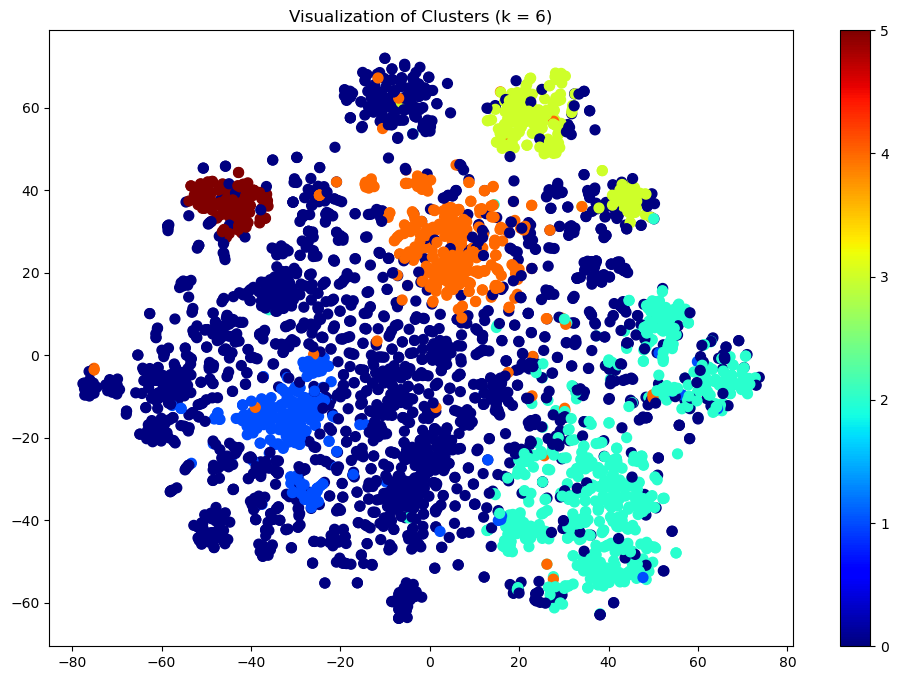

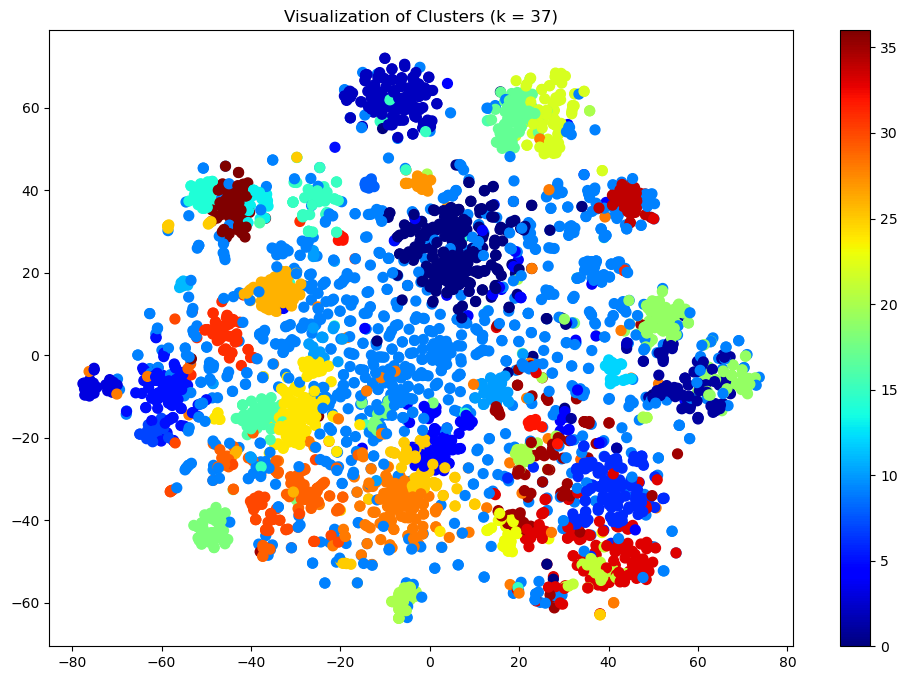

In [9]:
# 3.b.iii - Clustering visualization - k-means

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


for cluster_kmeans in [six_clusters_kmeans, thirty_seven_clusters_kmeans]:
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(articles_tfidf_df)


    # Plot the data
    plt.figure(figsize=(12, 8))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_kmeans.labels_, s=50, cmap='jet')
    plt.title(f"Visualization of Clusters (k = {cluster_kmeans.n_clusters})")
    plt.colorbar()
    plt.show()
    

In [10]:
## Exercise 3.c.1 - Apply DBSCAN

from sklearn.cluster import DBSCAN

# k = 6
six_clusters_dbscan = DBSCAN(eps=1.18, min_samples=40) # min_sample similar to the 'minimum category count = 5' 
six_clusters_dbscan.fit(articles_tfidf_df)
n_clusters_six = len(set(six_clusters_dbscan.labels_)) - (1 if -1 in six_clusters_dbscan.labels_ else 0) # -1 is the noise point
print(f"Number of clusters: {n_clusters_six}")

# k = 37
thirty_seven_clusters_dbscan = DBSCAN(eps=1.1, min_samples=9) # min_sample similar to the 'minimum section count = = 1' 
thirty_seven_clusters_dbscan.fit(articles_tfidf_df)
n_clusters_thirty_seven = len(set(thirty_seven_clusters_dbscan.labels_)) - (1 if -1 in thirty_seven_clusters_dbscan.labels_ else 0) # -1 is the noise point
print(f"Number of clusters: {n_clusters_thirty_seven}")

Number of clusters: 6
Number of clusters: 37


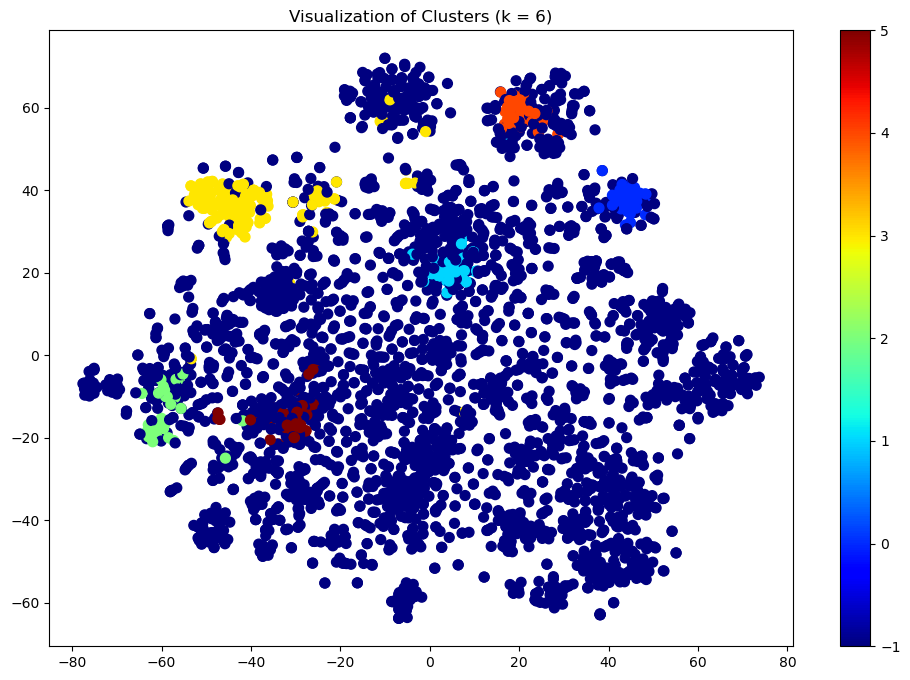

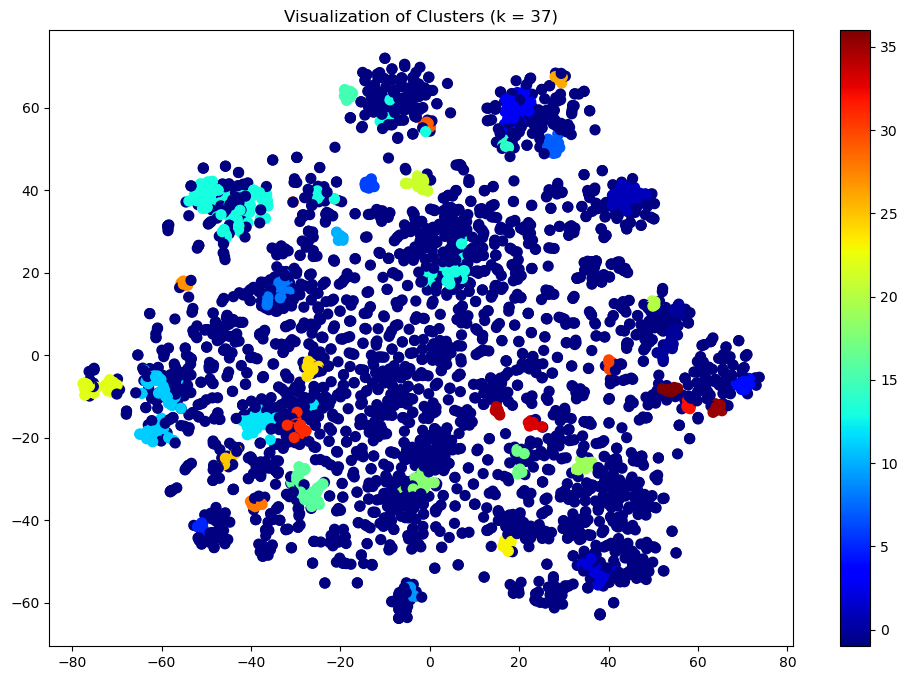

In [11]:
# 3.c.ii - Clustering visualization - dbscan

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


for cluster_dbscan in [six_clusters_dbscan, thirty_seven_clusters_dbscan]:
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(articles_tfidf_df)


    # Plot the data
    plt.figure(figsize=(12, 8))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_dbscan.labels_, s=50, cmap='jet')
    n_clusters  = len(set(cluster_dbscan.labels_)) - (1 if -1 in cluster_dbscan.labels_ else 0) # -1 is the noise point
    plt.title(f"Visualization of Clusters (k = {n_clusters})")
    plt.colorbar()
    plt.show()
    


In [12]:
# 3.d.i and ii - Clustering evaluation - k-means and dbscan

from sklearn.metrics import homogeneity_score, silhouette_score

def print_metrics(clustering_type, clusters, ground_truth, data):
    
    homogeneity = homogeneity_score(ground_truth, clusters.labels_)
    silhouette = silhouette_score(data, clusters.labels_)
    
    print(f"Type: {clustering_type}\n")
    print(f"Homogeneity: {homogeneity}")
    print(f"Silhouette: {silhouette}\n")
    print("-" * 40 + "\n\n")

# l cluster - k-means"
print_metrics("Small Clusters - k-means", six_clusters_kmeans , df['Category'], articles_tfidf_df)

# large cluster - k-means
print_metrics("Large Clusters - k-means", thirty_seven_clusters_kmeans , df['Section'], articles_tfidf_df)


# small cluster - dbscan
print_metrics("Small Clusters - dbscan", six_clusters_dbscan , df['Category'], articles_tfidf_df)


# large cluster - dbscan
print_metrics("Small Clusters - dbscan", thirty_seven_clusters_dbscan , df['Section'], articles_tfidf_df)

Type: Small Clusters - k-means

Homogeneity: 0.3053941356789409
Silhouette: 0.00983537478167575

----------------------------------------


Type: Large Clusters - k-means

Homogeneity: 0.5101938816838366
Silhouette: 0.024255529573836244

----------------------------------------


Type: Small Clusters - dbscan

Homogeneity: 0.06934891750878472
Silhouette: -0.00355912591096358

----------------------------------------


Type: Small Clusters - dbscan

Homogeneity: 0.17909975985365056
Silhouette: -2.6763436194900154e-05

----------------------------------------


